In [1]:
import pulp

# Criação do problema de maximização
lp_problem = pulp.LpProblem("Exemplo_PL", pulp.LpMaximize)

# Definição das variáveis
x = pulp.LpVariable("x", lowBound=0,cat='Float')  # x >= 0
y = pulp.LpVariable("y", lowBound=0,cat='Float')  # y >= 0

# Adição da função objetivo
lp_problem += 2*(x+y) +1*y, "Z"

# Adição das restrições
lp_problem +=  x + 2*y <= 6, "Restrição_1"
lp_problem += x <= 2, "Restrição_2"

# Resolução do problema
lp_problem.solve()

# Exibição dos resultados
print("Status:", pulp.LpStatus[lp_problem.status])
print("Valor de x =", pulp.value(x))
print("Valor de y =", pulp.value(y))
print("Valor da função objetivo Z =", pulp.value(lp_problem.objective))

Status: Optimal
Valor de x = 2.0
Valor de y = 2.0
Valor da função objetivo Z = 10.0


In [4]:

# Criação do problema de maximização
lp_problem = pulp.LpProblem("Exemplo_PL", pulp.LpMaximize)

# Definição das variáveis
x = pulp.LpVariable("x", lowBound=0,cat='Float')  # x >= 0
y = pulp.LpVariable("y", lowBound=0,cat='Float')  # y >= 0

# Adição da função objetivo
lp_problem += 1*(x) +5*y, "Z"

# Adição das restrições
lp_problem +=  x + 4*y <= 20, "Restrição_1"
lp_problem += 4*x + y <= 20, "Restrição_2"

# Resolução do problema
lp_problem.solve()

# Exibição dos resultados
print("Status:", pulp.LpStatus[lp_problem.status])
print("Valor de x =", pulp.value(x))
print("Valor de y =", pulp.value(y))
print("Valor da função objetivo Z =", pulp.value(lp_problem.objective))

Status: Optimal
Valor de x = 0.0
Valor de y = 5.0
Valor da função objetivo Z = 25.0


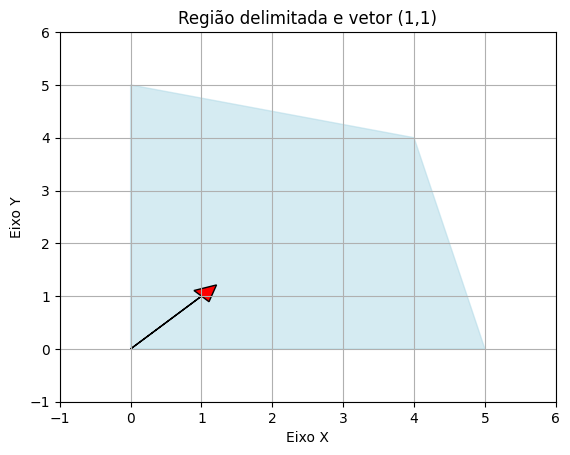

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Pontos para delimitar a região
points = np.array([[0, 0], [0, 5], [4, 4], [5, 0]])

# Coordenadas x e y dos pontos
x = points[:, 0]
y = points[:, 1]

# Plotando a região
plt.fill(x, y, color='lightblue', alpha=0.5)  # Preenche a área delimitada pelos pontos

# Adicionando a seta representando o vetor (1,1)
plt.arrow(0, 0, 1, 1, head_width=0.3, head_length=0.3, fc='red', ec='black')  # Define a seta

# Configurações adicionais do gráfico
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Região delimitada e vetor (1,1)')

# Mostra o gráfico
plt.grid(True)
plt.show()